# Import packages and data

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')

In [135]:
raw_data = pd.read_csv('Data Science Evaluation.csv')

In [136]:
raw_data.sort_values(by=['Item Type'])[0:10]

,Region,Country,Item Type,Fiscal Year,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Profit as % of Cost
17274,Asia,Turkmenistan,Baby Food,2011,Online,C,3/14/11,621611011,4/7/11,7366,255.28,159.42,1880392.48,1174287.72,706104.76,0.601305
4699,Europe,Ireland,Baby Food,2011,Online,M,3/13/11,245741689,4/6/11,9281,255.28,159.42,2369253.68,1479577.02,889676.66,0.601305
4698,Europe,Finland,Baby Food,2010,Online,H,12/15/10,569374024,1/15/11,9281,255.28,159.42,2369253.68,1479577.02,889676.66,0.601305
47083,Middle East and North Africa,Azerbaijan,Baby Food,2016,Offline,M,6/2/16,932217681,6/12/16,2783,255.28,159.42,710444.24,443665.86,266778.38,0.601305
4695,Australia and Oceania,New Zealand,Baby Food,2016,Offline,L,3/15/16,771825873,4/10/16,9282,255.28,159.42,2369508.96,1479736.44,889772.52,0.601305
43659,Europe,Moldova,Baby Food,2016,Offline,C,8/31/16,258968198,10/15/16,3299,255.28,159.42,842168.72,525926.58,316242.14,0.601305
43655,Middle East and North Africa,Morocco,Baby Food,2014,Online,H,2/15/14,662689149,2/26/14,3300,255.28,159.42,842424.00,526086.00,316338.00,0.601305
16871,Sub-Saharan Africa,Chad,Baby Food,2011,Offline,L,12/18/11,790642106,2/4/12,7424,255.28,159.42,1895198.72,1183534.08,711664.64,0.601305
50317,Sub-Saharan Africa,Swaziland,Baby Food,2011,Online,H,8/28/11,196482169,10/6/11,2295,255.28,159.42,585867.60,365868.90,219998.70,0.601305
14374,Europe,Armenia,Baby Food,2010,Online,L,9/12/10,859039723,11/1/10,7799,255.28,159.42,1990928.72,1243316.58,747612.14,0.601305


# Product selection

In [137]:
product_summary = raw_data.groupby('Item Type')["Profit as % of Cost"].describe().sort_values(by=['mean'],ascending=False)
product_summary.reset_index(inplace=True)
product_summary

,Item Type,count,mean,std,min,25%,50%,75%,max
0,Clothes,5414.0,2.049107,4.752193e-14,2.049107,2.049107,2.049107,2.049107,2.049107
1,Cereal,5425.0,0.756468,6.339958e-14,0.756468,0.756468,0.756468,0.756468,0.756468
2,Vegetables,5456.0,0.694270,9.670929e-14,0.694270,0.694270,0.694270,0.694270,0.694270
3,Cosmetics,5502.0,0.660274,7.805577e-14,0.660274,0.660274,0.660274,0.660274,0.660274
4,Baby Food,5510.0,0.601305,5.584929e-14,0.601305,0.601305,0.601305,0.601305,0.601305
5,Snacks,5477.0,0.565887,4.885427e-14,0.565887,0.565887,0.565887,0.565887,0.565887
6,Beverages,5494.0,0.492608,2.820223e-14,0.492608,0.492608,0.492608,0.492608,0.492608
7,Personal Care,5491.0,0.442209,1.876448e-14,0.442209,0.442209,0.442209,0.442209,0.442209
8,Fruits,5433.0,0.348266,2.303925e-14,0.348266,0.348266,0.348266,0.348266,0.348266
9,Household,5456.0,0.329785,3.031187e-14,0.329785,0.329785,0.329785,0.329785,0.329785


The table shows that there is only one "Profit as % of Cost" value for one type of item.

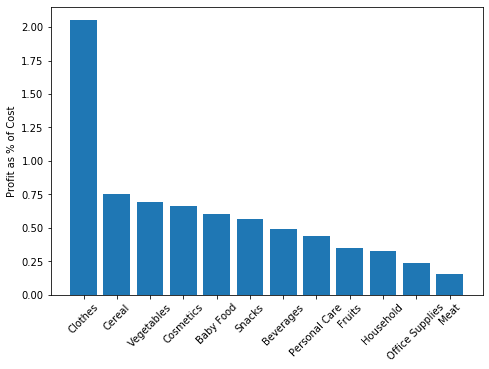

In [138]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(product_summary['Item Type'],product_summary['mean'])
plt.xticks(rotation=45)
plt.ylabel("Profit as % of Cost")
plt.show()

From the plot above we can see that clothes, cereal and vegetables are the most profitable products and household, office supplies and meat have lowest profitability.

# Region selection

In [139]:
region_summary = raw_data.groupby('Region')['Total Profit','Total Cost'].sum().reset_index()
region_summary['Profit as % of Cost'] = region_summary['Total Profit']/region_summary['Total Cost']
region_summary.sort_values(by=['Profit as % of Cost'],ascending=False,inplace=True)
region_summary

,Region,Total Profit,Total Cost,Profit as % of Cost
0,Asia,3.723009e+09,8.728178e+09,0.426551
6,Sub-Saharan Africa,6.638568e+09,1.581611e+10,0.419735
4,Middle East and North Africa,3.194428e+09,7.643912e+09,0.417905
3,Europe,6.783846e+09,1.623404e+10,0.417878
1,Australia and Oceania,2.047147e+09,4.910726e+09,0.416873
2,Central America and the Caribbean,2.747683e+09,6.636692e+09,0.414014
5,North America,5.393788e+08,1.309927e+09,0.411763


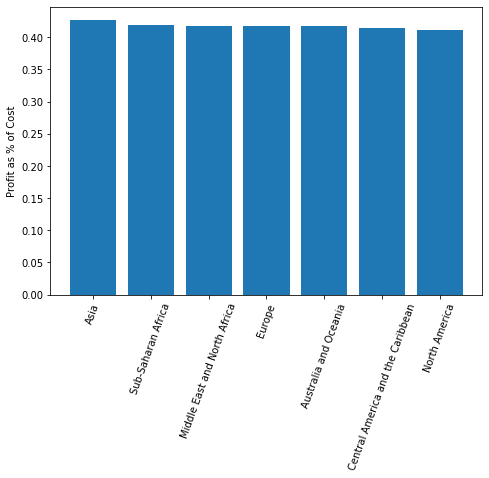

In [140]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(region_summary['Region'],region_summary['Profit as % of Cost'])
plt.xticks(rotation=70)
plt.ylabel("Profit as % of Cost")
plt.show()

This bar-chart shows that the profitabilities of different regions are similar, so no region should be given preference.

# Easiest selling product 

In [141]:
raw_data['Order Date'] =  pd.to_datetime(raw_data['Order Date'], format='%m/%d/%y')
raw_data['Ship Date'] =  pd.to_datetime(raw_data['Ship Date'], format='%m/%d/%y')
raw_data['Selling Days'] = (raw_data['Ship Date'] - raw_data['Order Date']).dt.days
raw_data[0:5]

,Region,Country,Item Type,Fiscal Year,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Profit as % of Cost,Selling Days
0,Sub-Saharan Africa,Cote d'Ivoire,Snacks,2010,Online,C,2010-04-23,241891753,2010-04-26,10000,152.58,97.44,1525800.0,974400.0,551400.0,0.565887,3
1,Sub-Saharan Africa,Ethiopia,Snacks,2010,Online,H,2010-06-06,530075585,2010-07-01,10000,152.58,97.44,1525800.0,974400.0,551400.0,0.565887,25
2,Central America and the Caribbean,Panama,Clothes,2011,Offline,H,2011-01-02,293357980,2011-01-22,10000,109.28,35.84,1092800.0,358400.0,734400.0,2.049107,20
3,Europe,Sweden,Office Supplies,2012,Online,L,2012-10-02,360841929,2012-10-20,10000,651.21,524.96,6512100.0,5249600.0,1262500.0,0.240495,18
4,Europe,Romania,Cosmetics,2016,Online,M,2016-03-16,707318103,2016-05-03,10000,437.20,263.33,4372000.0,2633300.0,1738700.0,0.660274,48


In [142]:
selling_days_summary_region = raw_data.groupby(['Region', 'Item Type'])['Selling Days'].mean().reset_index()

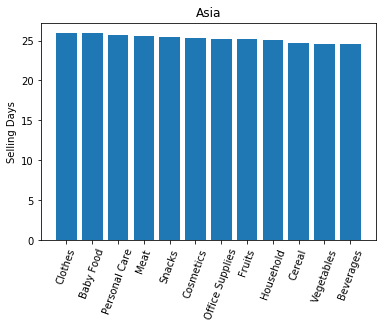

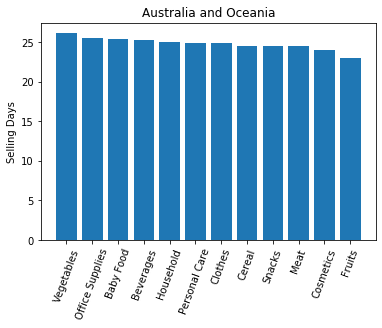

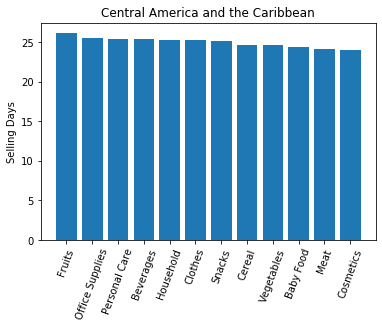

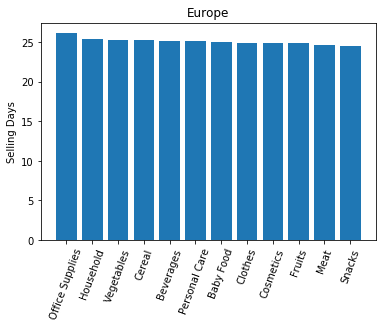

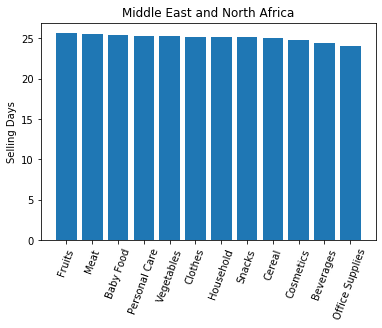

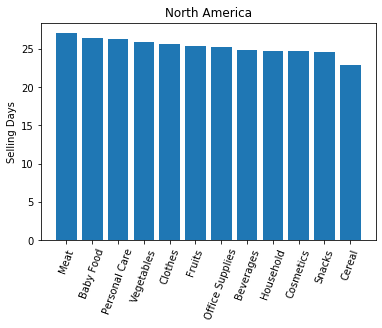

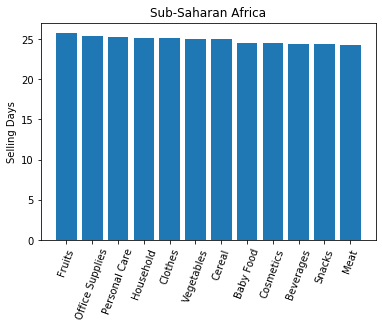

In [143]:
# Visualize the table above
for i in range(len(pd.unique(selling_days_summary['Region']))):
    region = selling_days_summary_region[i*12:(i+1)*12]
    region.sort_values(by=['Selling Days'],ascending=False,inplace=True)
    plt.bar(region['Item Type'], region['Selling Days'])
    plt.xticks(rotation=70)
    plt.ylabel("Selling Days")
    plt.title(pd.unique(region['Region'])[0])
    plt.show()

In [144]:
selling_days_summary_item = raw_data.groupby(['Item Type','Region'])['Selling Days'].mean().reset_index()

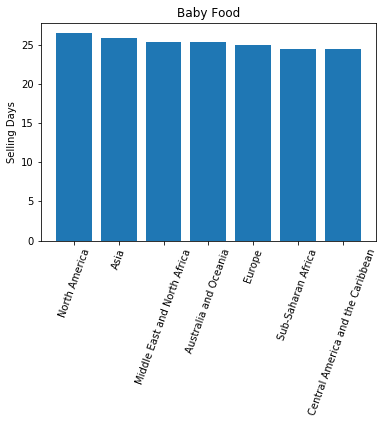

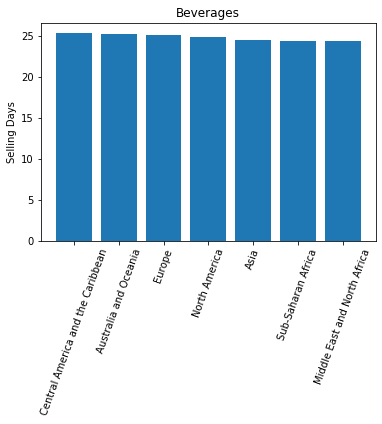

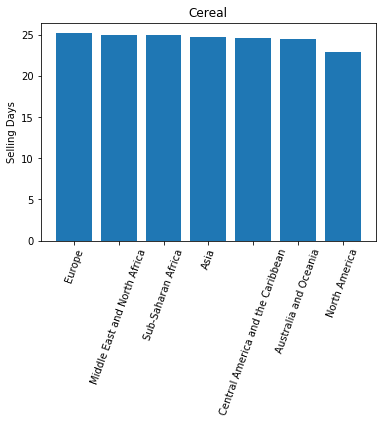

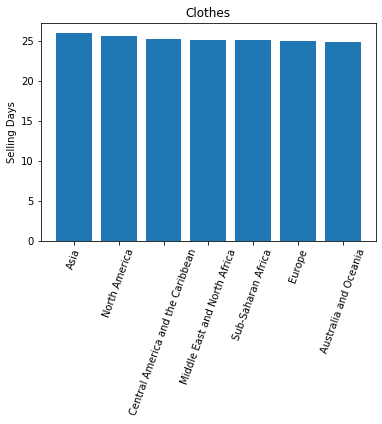

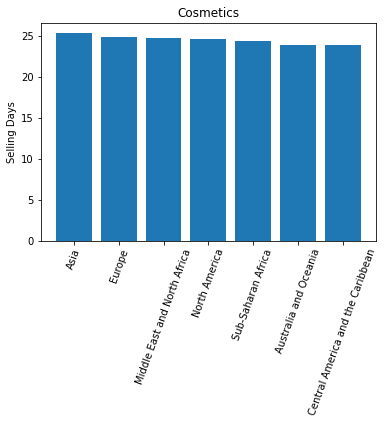

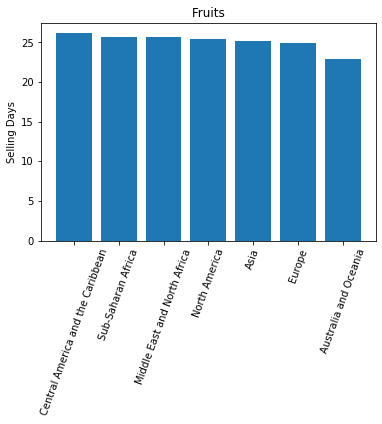

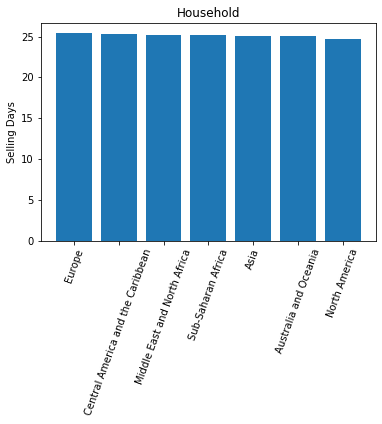

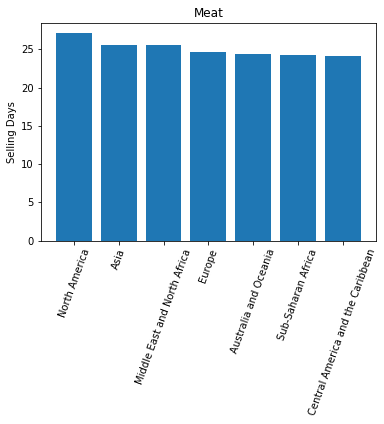

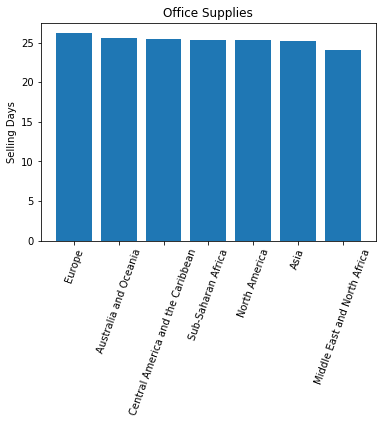

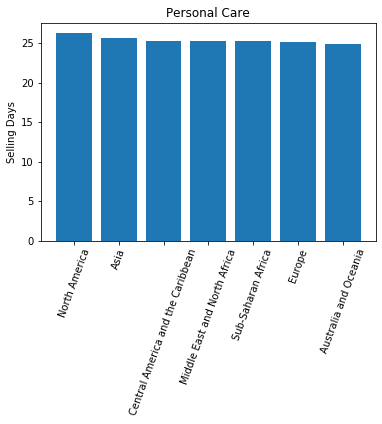

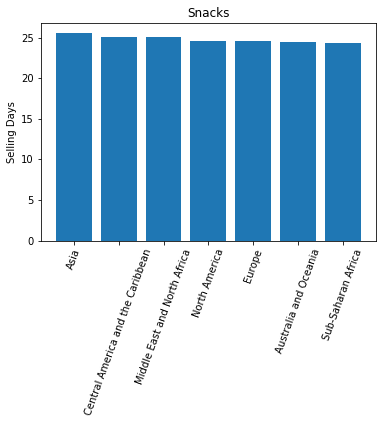

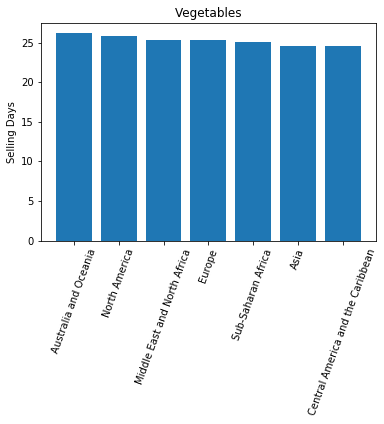

In [145]:
# Visualize the table above
for i in range(len(pd.unique(selling_days_summary['Item Type']))):
    product = selling_days_summary_item[i*7:(i+1)*7]
    product.sort_values(by=['Selling Days'],ascending=False,inplace=True)
    plt.bar(product['Region'], product['Selling Days'])
    plt.xticks(rotation=70)
    plt.ylabel("Selling Days")
    plt.title(pd.unique(product['Item Type'])[0])
    plt.show()

Because there is no spike or any other obvious trends in the bar-charts above, there might be no relationship between average selling days and product types in each region or between average selling days and regions for each product type.